## New graph at the bottom

In [1]:
%load_ext autoreload
%autoreload 2

# ML libraries 
from sklearn.cluster import KMeans
from sklearn.neighbors.kde import KernelDensity

# Computation & Signal Processing
from scipy import signal
import numpy as np
import pandas as pd
import pylab as pl
import pickle
import scipy.io as spio

#biosppy package for ecg signal analysis
from biosppy import storage
from biosppy.signals import ecg

matlabEMG = spio.loadmat('302_p1_EMG_datamatlab.mat', squeeze_me=True)



# Plotting
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.io as pio
plotly.offline.init_notebook_mode(connected=True)
%matplotlib widget

from utils import * #import data import, clean up and sampling functions. 
# import time
import time 

from ECG_feature_extractor_1000 import *
# fs: sampling frequency
# df: reading a csv file and store it in panads dataframe (http://pandas.pydata.org/pandas-docs/stable/)

start = time.time()
fs_acc = 148.148 #actual 148.15 
fs_emg = 1925.9258 #from 1/df['X[s]'][1] 
fs_ecg = 1925.9258

gdrive = True
data_dir = 'csv'

# Specifiying directory
#file = data_dir*gdrive + '/OA_2019_302_P1_Rep_1.3.csv'
#file2 = data_dir*gdrive + '/OA_2019_302_NW2_Rep_1.5.csv'
#file3 = data_dir*gdrive + '/OA_2019_302_P1_Rep_1.3.csv'
#file4 = data_dir*gdrive + '/OA_2019_302_P2_Rep_1.4.csv'

# loading and parsing data
df = load_data('/OA_2019_302_NW1_Rep_1.2.csv', data_dir )
df2 = load_data('/OA_2019_302_NW2_Rep_1.5.csv', data_dir)
df3 = load_data('/OA_2019_302_P1_Rep_1.3.csv', data_dir)
df4 = load_data('/OA_2019_302_P2_Rep_1.4.csv', data_dir)



# data clean up and assignment
nw1 = delsys_cleanup(df)
nw2 = delsys_cleanup(df2)
p1 = delsys_cleanup(df3)
p2 = delsys_cleanup(df4)

end = time.time()
print(f'data loading + clean up cost = {end-start}s')



data loading + clean up cost = 21.326547861099243s


In [2]:
delsys_cleanup?

In [3]:
data_dir_treadmill = 'Treadmill data_trial1-4'
file3_clientinfo = 'OA_302_P1_CLIENTINFO'
file3_cueing = 'OA_302_N1_CUEING'
file3_gaitcycles = 'OA_201_N1_GAITCYCLES'
file3_rawdata = '/OA_302_P1_RAWDATA.csv'

treadmill_data = load_data(file3_rawdata, data_dir_treadmill)

data_dir_fNIRS = 'fNIRS'
file3_fNIRS = '/OA_FNIRS_2019_WALK_306_oxydata.txt'
fNIRS = pd.read_csv(data_dir_fNIRS+file3_fNIRS,sep='\t')

In [4]:
matlabEMG.keys()


dict_keys(['__header__', '__version__', '__globals__', 'data', 'data_acc', 'data_acc_time', 'data_new', 'data_time'])

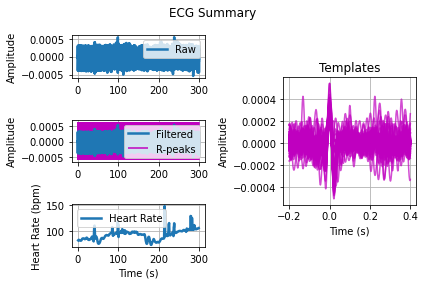

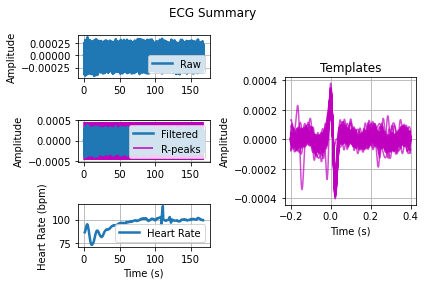

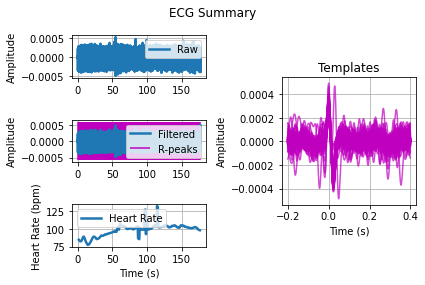

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



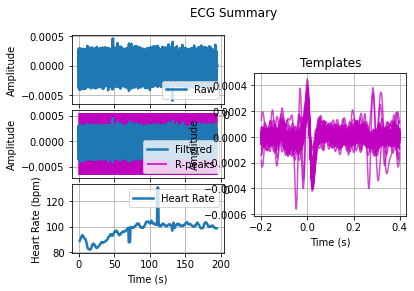

cost= 14.3159658908844s


In [5]:

%matplotlib inline
'''
signal, mdata = storage.load_txt(file)
Fs = mdata['sampling_rate']
N = len(signal)  # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, signal, lw=2)
'''
RR_bank, pack_bank, ecg_out_bank = [], [], []
start = time.time()


BS_signal_analysis = ecg.ecg(signal=nw1.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis2 = ecg.ecg(signal=nw2.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis3 = ecg.ecg(signal=p1.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis4 = ecg.ecg(signal=p2.ecg, sampling_rate=fs_ecg, show=True)

pack,  ecg_out  = freq_ratio_hybrid(nw1.ecg, fs=fs_ecg, RR=BS_signal_analysis['rpeaks'], method = 'periodogram', factor = 1)
pack2, ecg_out2 = freq_ratio_hybrid(nw2.ecg, fs=fs_ecg, RR=BS_signal_analysis2['rpeaks'], method = 'periodogram', factor = 1)
pack3, ecg_out3 = freq_ratio_hybrid(p1.ecg, fs=fs_ecg, RR=BS_signal_analysis3['rpeaks'], method = 'periodogram', factor = 1)
pack4, ecg_out4 = freq_ratio_hybrid(p2.ecg, fs=fs_ecg, RR=BS_signal_analysis4['rpeaks'], method = 'periodogram', factor = 1)


end = time.time()

print(f'cost= {end-start}s')



In [6]:
type(pd.to_datetime(p2.time))

pandas.core.series.Series

In [7]:
pd.to_datetime(p2.time)

0        1970-01-01 00:00:00.000000000
1        1970-01-01 00:00:00.000000000
2        1970-01-01 00:00:00.000000000
3        1970-01-01 00:00:00.000000000
4        1970-01-01 00:00:00.000000000
                      ...             
374160   1970-01-01 00:00:00.000000194
374161   1970-01-01 00:00:00.000000194
374162   1970-01-01 00:00:00.000000194
374163   1970-01-01 00:00:00.000000194
374164   1970-01-01 00:00:00.000000194
Name: time, Length: 374165, dtype: datetime64[ns]

In [8]:
n302 = {'p1':p1, 'p2':p2, 'nw1':nw1, 'nw2':nw2}
cohort = {'302':n302}
cohort['302']['p1'].fs = fs_ecg
interval_length = 30 # 30 seconds
interval_index_span = cohort['302']['p1'].fs * interval_length # for a 30 second interval


In [9]:
cohort['302']['p1'].fs

1925.9258

In [10]:
# i want to create the loop here
cohort['302']['p1'].shape[0]/interval_index_span
np.round(cohort['302']['p1'].shape[0]/interval_index_span)

6.0

In [11]:
stride=5 #5 second strides
stride_length_i = np.int( stride*cohort['302']['p1'].fs)
print(f'stride length {stride_length_i}')

interval_length = 30 #30 seconds is the interval window for each datapoint. 
interval_length_i = np.int(interval_length*cohort['302']['p1'].fs)
print(f'interval length {interval_length_i}')


stride length 9629
interval length 57777


In [12]:
cohort['302']['p1'].shape[0]

340184

In [13]:
total_interval_over_strides = np.int(cohort['302']['p1'].shape[0] // stride_length_i)
f'{total_interval_over_strides}'

'35'

In [14]:
lfhf_metric = []
sdnn_metric = []
pack = []
ecg_out = []
intervals = [None]*(total_interval_over_strides-14)
for i in range(total_interval_over_strides-14):
    intervals[i] = [i*stride_length_i, (i)*stride_length_i+interval_length_i]        

print(intervals)
print(len(intervals))

[[0, 57777], [9629, 67406], [19258, 77035], [28887, 86664], [38516, 96293], [48145, 105922], [57774, 115551], [67403, 125180], [77032, 134809], [86661, 144438], [96290, 154067], [105919, 163696], [115548, 173325], [125177, 182954], [134806, 192583], [144435, 202212], [154064, 211841], [163693, 221470], [173322, 231099], [182951, 240728], [192580, 250357]]
21


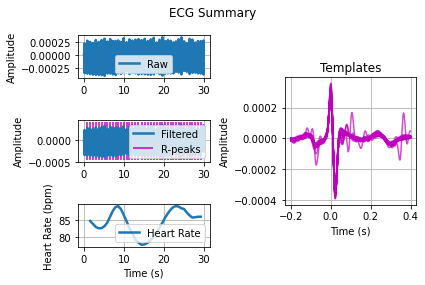

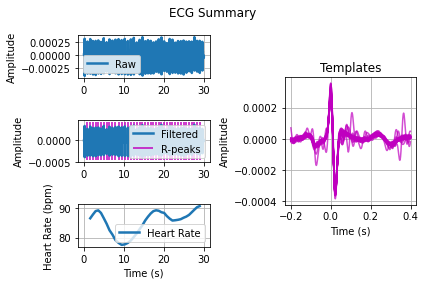

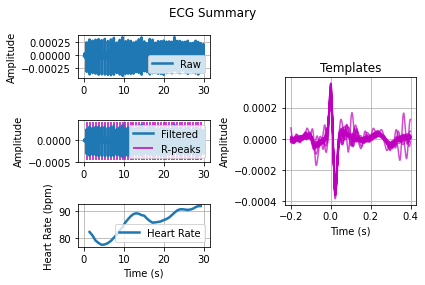

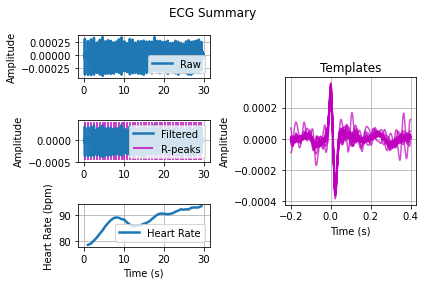

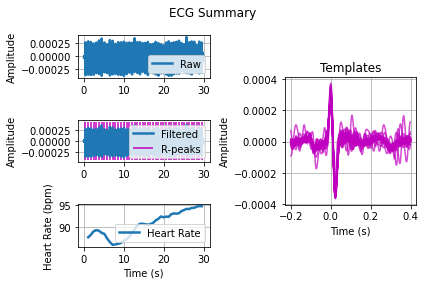

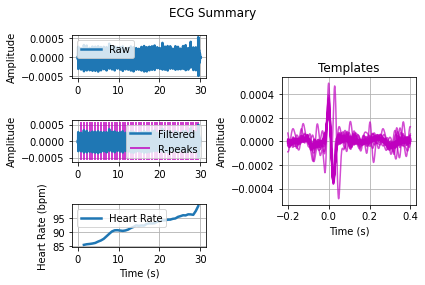

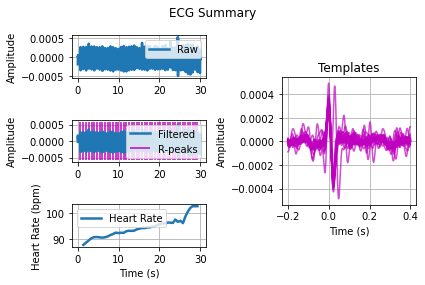

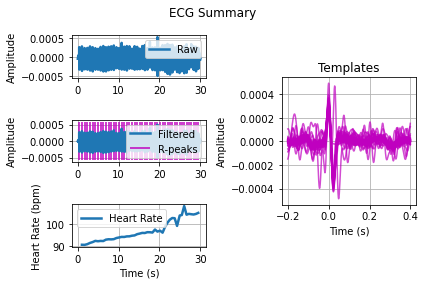

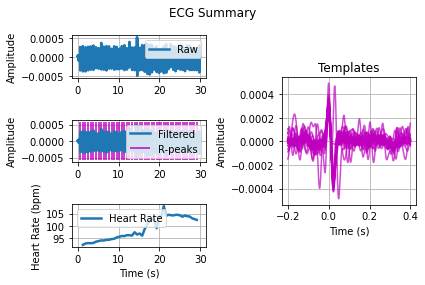

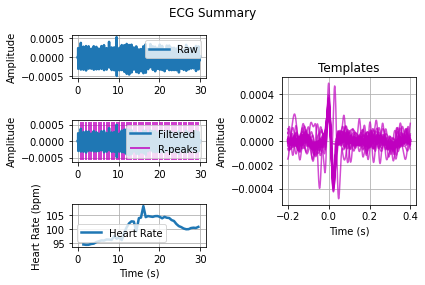

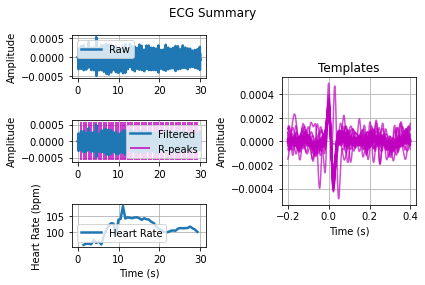

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



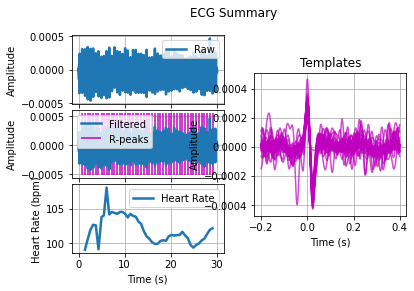

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



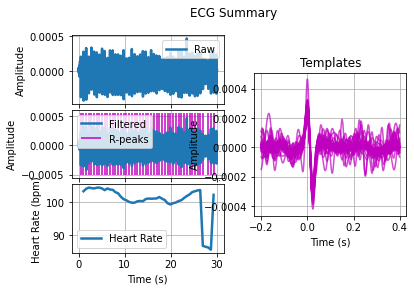

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



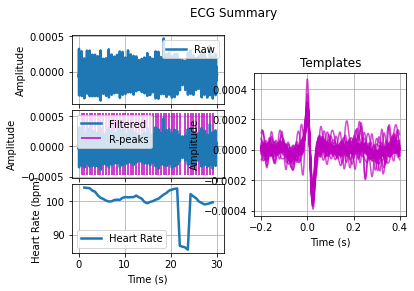

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



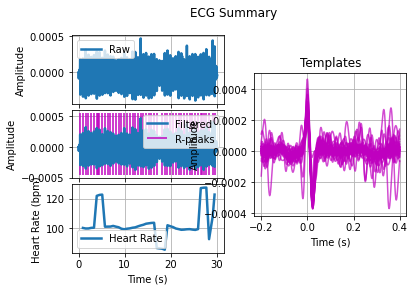

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



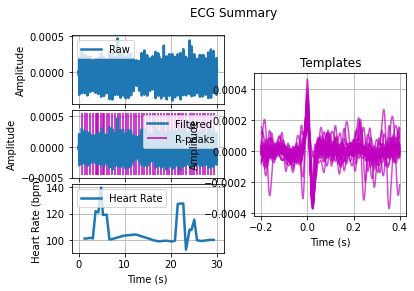

/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



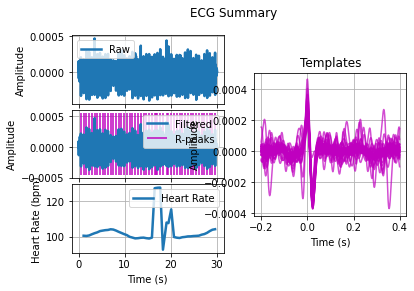

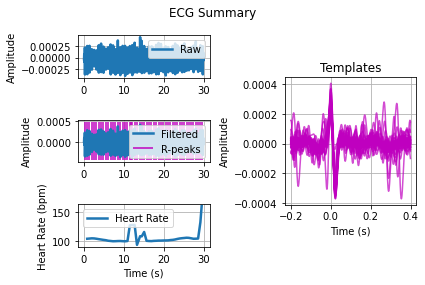

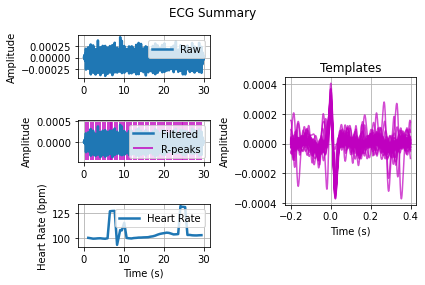

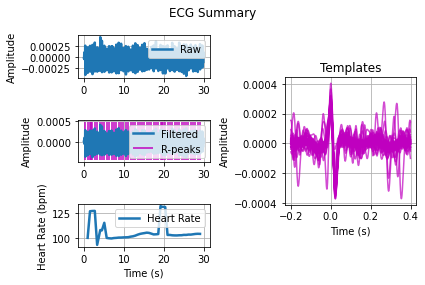

In [15]:
segments = []
RR_store = []
for idx, val in enumerate(intervals[:-1]):
    current_segment = cohort['302']['p1'][val[0]:val[1]].ecg
    fs = cohort['302']['p1'].fs
    
    BS_signal_analysis = ecg.ecg(signal=current_segment, sampling_rate=fs, show=True)
    RR = BS_signal_analysis['rpeaks']
    RR_store.append(RR)
    A, B = freq_ratio_hybrid(current_segment, fs=fs, RR=BS_signal_analysis['rpeaks'], method = 'periodogram', factor = 1)
    pack.append(A)
    ecg_out.append(B)
    plt.close()


In [16]:
lf_hf_store = []
#  standard deviation of the IBI of normal sinus beats
sdnn_store = []



for entry in pack:
    lf_hf_store.append(entry['lf_hf'])

for entry in RR_store:
    ibi = np.diff(entry)
    sdnn = np.std(entry)
    sdnn_store.append(sdnn)


In [17]:
%matplotlib widget
num_figures = 30
i = 1
fig1 = plt.figure(1)
ax1 = fig1.gca()


# plt.subplot(num_figures,1,i)
plt.title('Treadmill Speed')
plt.xlabel('s')
ax1.plot(treadmill_data.Time, treadmill_data.Speed)
plt.xlim(0,100)
i+=1
fig1.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:

fig2 = plt.figure(2)
ax2 = fig2.gca()
plt.title('LF/HF')
scale = [15+i[0]/1910 for i in intervals[0:-1]]
plt.xlabel('s')
ax2.plot(lf_hf_store,'*')
fig2.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## (sdnn, lf/hf) Graph

In [19]:

fig3 = plt.figure(3)
ax3 = fig3.gca()
plt.title('(sdnn, lf/hf)')
#ax3.plot(sdnn_store)
#ax3.plot(scale, sdnn_store)
# ax3.plot(sdnn_store, '*')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
plt.scatter(sdnn_store,lf_hf_store )
fig3.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …